In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df=pd.read_csv("Diabetes_Missing_Data.csv")


In [19]:
df

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnant           768 non-null    int64  
 1   Glucose            763 non-null    float64
 2   Diastolic_BP       733 non-null    float64
 3   Skin_Fold          541 non-null    float64
 4   Serum_Insulin      394 non-null    float64
 5   BMI                757 non-null    float64
 6   Diabetes_Pedigree  768 non-null    float64
 7   Age                768 non-null    int64  
 8   Class              768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


### Null Values

In [24]:
df.isnull().sum()

Pregnant               0
Glucose                5
Diastolic_BP          35
Skin_Fold            227
Serum_Insulin        374
BMI                   11
Diabetes_Pedigree      0
Age                    0
Class                  0
dtype: int64

In [60]:
data=df.dropna()

In [61]:
data

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181.0,88.0,44.0,510.0,43.3,0.222,26,1
755,1,128.0,88.0,39.0,110.0,36.5,1.057,37,1
760,2,88.0,58.0,26.0,16.0,28.4,0.766,22,0
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0


In [62]:
data.isnull().sum()

Pregnant             0
Glucose              0
Diastolic_BP         0
Skin_Fold            0
Serum_Insulin        0
BMI                  0
Diabetes_Pedigree    0
Age                  0
Class                0
dtype: int64

### Checking for duplicates

In [63]:
data.count()

Pregnant             392
Glucose              392
Diastolic_BP         392
Skin_Fold            392
Serum_Insulin        392
BMI                  392
Diabetes_Pedigree    392
Age                  392
Class                392
dtype: int64

In [88]:
print("Duplicates: ",df.duplicated().sum())

Duplicates:  0


In [65]:
data.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1


### Changing Data Types

In [77]:
data.dtypes

Pregnant               int32
Glucose              float64
Diastolic_BP         float64
Skin_Fold            float64
Serum_Insulin        float64
BMI                  float64
Diabetes_Pedigree    float64
Age                    int64
Class                  int64
dtype: object

In [84]:
# help(data.astype)
print("Before:",data["Pregnant"].dtype)
data=data.astype({"Pregnant":float})
print("After:\n",data.dtypes,sep="")

Before: int32
After:
Pregnant             float64
Glucose              float64
Diastolic_BP         float64
Skin_Fold            float64
Serum_Insulin        float64
BMI                  float64
Diabetes_Pedigree    float64
Age                    int64
Class                  int64
dtype: object


### Renaming Columns

In [115]:
data=data.rename(columns={"BMI":"Body_Mass_Index"})
data

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,Body_Mass_Index,Diabetes_Pedigree,Age,Class
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1.0,189.0,60.0,23.0,846.0,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0.0,181.0,88.0,44.0,510.0,43.3,0.222,26,1
755,1.0,128.0,88.0,39.0,110.0,36.5,1.057,37,1
760,2.0,88.0,58.0,26.0,16.0,28.4,0.766,22,0
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0


### Dropping column

In [94]:
print("Before:",df.columns)
df1=df.drop(["Skin_Fold"],axis=1)
print("After: ",df1.columns)

Before: Index(['Pregnant', 'Glucose', 'Diastolic_BP', 'Skin_Fold', 'Serum_Insulin',
       'BMI', 'Diabetes_Pedigree', 'Age', 'Class'],
      dtype='object')
After:  Index(['Pregnant', 'Glucose', 'Diastolic_BP', 'Serum_Insulin', 'BMI',
       'Diabetes_Pedigree', 'Age', 'Class'],
      dtype='object')


### Basic Statistics

In [97]:
df.describe()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Finding Outliers (Box plot)

In [111]:
help(sns.boxplot)

Help on function boxplot in module seaborn.categorical:

boxplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, ax=None, **kwargs)
    Draw a box plot to show distributions with respect to categories.
    
    A box plot (or box-and-whisker plot) shows the distribution of quantitative
    data in a way that facilitates comparisons between variables or across
    levels of a categorical variable. The box shows the quartiles of the
    dataset while the whiskers extend to show the rest of the distribution,
    except for points that are determined to be "outliers" using a method
    that is a function of the inter-quartile range.
    
    .. note::
        This function always treats one of the variables as categorical and
        draws data at ordinal positions (0, 1, ... n) on the relevant axis,
        even when the data has a numeric or date type.

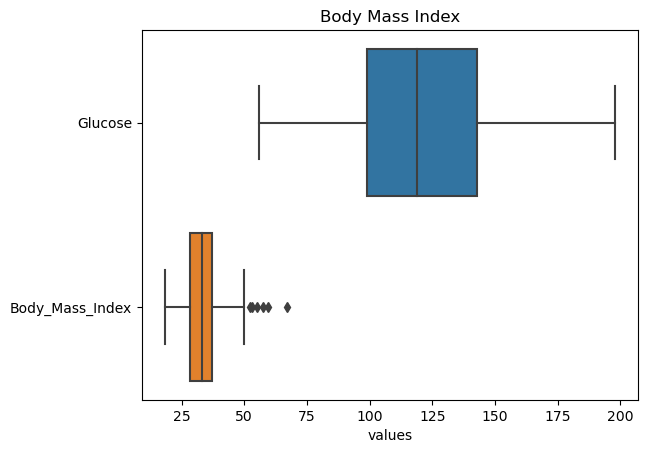

In [142]:
sns.boxplot(data[["Glucose","Body_Mass_Index"]],orient="h")
plt.title("Body Mass Index")      
plt.xlabel("values") 
plt.show()

### Visulaization Graphs

Text(0.5, 1.0, 'AGE Vs BMI')

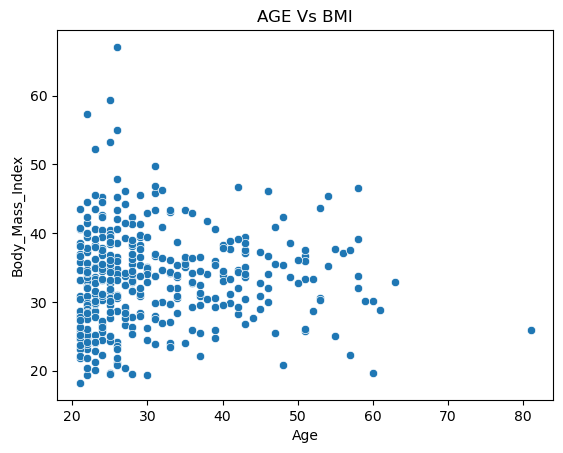

In [128]:
sns.scatterplot(x="Age",y="Body_Mass_Index",data=data)
plt.title("AGE Vs BMI")

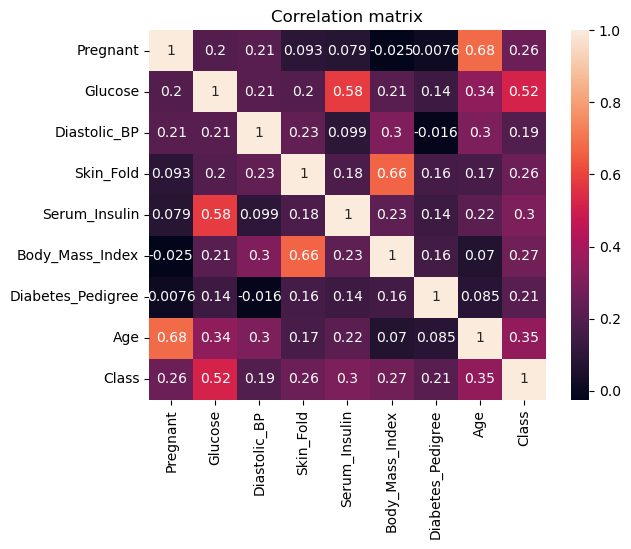

In [161]:
corr=data.corr()
corr
sns.heatmap(data=corr,annot=True,)
plt.title("Correlation matrix")
plt.show()

In [154]:
sns.heatmap?

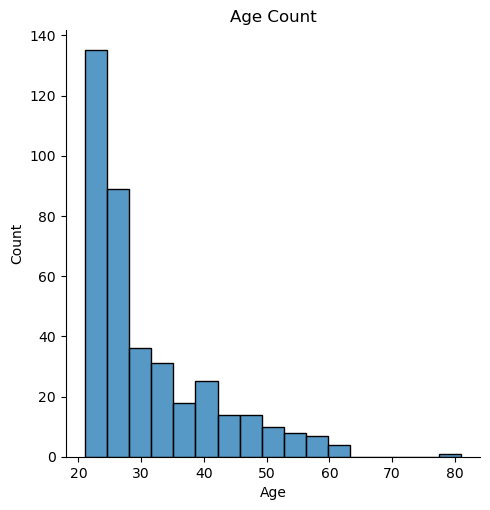

In [164]:
sns.displot(data['Age'])
plt.title("Age Count")
plt.show()

Text(0, 0.5, 'Class')

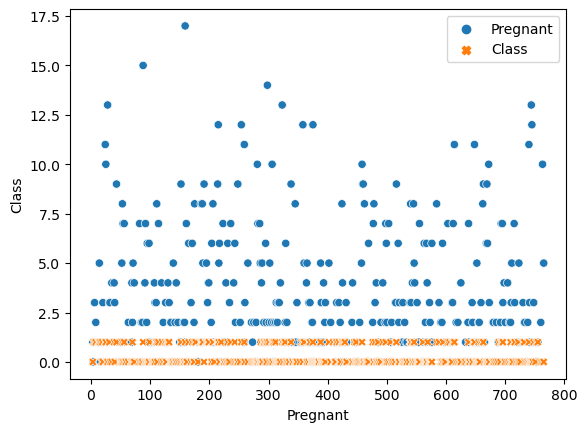

In [167]:
sns.scatterplot(data[["Pregnant","Class"]])
plt.xlabel("Pregnant")
plt.ylabel("Class")